In [1]:
import pickle 
import numpy as np
import os

In [2]:
dim = 3
num_train = 200
reps_st = 0 #0 #can be as low as 0
reps_end = 100 #1 #can be as high as 50
iteration_all = np.arange(reps_st,reps_end)
#training parameters
max_depth = 3 #3
max_depth_true = 3
min_weights_per_node = 20 #20

mu_all = np.round(np.arange(0.1,1,0.1),4)
mu_all = [0.5]
lamb_all = np.append(np.append(np.round(np.arange(0.1,1.0,0.2),4),np.arange(1.0,10.0,2.0)),np.arange(10,100,20))
# lamb_all = np.append(lamb_all,np.arange(100,1000,200))
lamb_all = [100]

In [3]:
data_generation_process = "Tree_based_Data_Generation"
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
project_directory = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(parent_directory))))
# print("project_directory:", project_directory)
DataPath_parent = project_directory + '/Data_JOC_R1_Submit/Shortest_Path_Tree/dim='+str(dim) +'_depth_'+str(max_depth)+"_Tree_based_Data_Generation/"
# print("DataPath_parent:", DataPath_parent)
result_dir = DataPath_parent +"result/Data_size="+str(num_train)+"/"
print("result_dir:", result_dir)

result_dir: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Tree/dim=3_depth_3_Tree_based_Data_Generation/result/Data_size=200/


In [4]:
with open(result_dir+'cost_Oracle.pkl', "rb") as tf:
    cost_Oracle = pickle.load(tf)
with open(result_dir+'cost_MSE.pkl', "rb") as tf:
    cost_MSE = pickle.load(tf)
with open(result_dir+'cost_SPO.pkl', "rb") as tf:
    cost_SPO = pickle.load(tf)
with open(result_dir+'cost_DDR.pkl', "rb") as tf:
    cost_DDR = pickle.load(tf)

In [5]:
from scipy.stats import gaussian_kde
from matplotlib import gridspec
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def figure_plot_upright(all_x, all_y, figure_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], 
                        ysame = 0, yrange = [6,6], sublabel = '', ypio = 1):
    
    data = np.asarray([all_x,all_y])

    xmin, ymin = data.min(axis = 1)
    xmax, ymax = data.max(axis = 1)

    xmax, xmin = tuple(np.array([xmax, xmin]) + 0.1*(xmax - xmin)*np.array([1, -1]))
    ymax, ymin = tuple(np.array([ymax, ymin]) + 0.1*(ymax - ymin)*np.array([1, -1]))

    ####### Obtain KDE  

    #KDE for top marginal
    kde_X = gaussian_kde(data[0])
    #KDE for right marginal
    kde_Y = gaussian_kde(data[1])

    x = np.linspace(0, 100, 100)
    y = np.linspace(ymin, ymax, 100)

    dx = kde_X(x) # X-marginal density
    dy = kde_Y(y) # Y-marginal density

    #Define grid for subplots
    gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios = [1, 3])

    ####### Create scatter plot
    fig = plt.figure(figsize = size)
    ax = plt.subplot(gs[1, 0])
    cax = ax.scatter(data[0], data[1], s = 15, color='#003D7C', marker = "o", edgecolors = "#EF7C00")
    plt.xlabel('Head-to-head (%)')

    plt.ylabel('Regret reduction (%)') #pio
    
    
    if ysame == 0:
        plt.vlines(50, ymin, ymax, linestyle="dashed", alpha = 0.8,color = 'k')
    else:
        plt.vlines(50, yrange[0], yrange[1], linestyle="dashed", alpha = 0.8,color = 'k')
    
    if ypio == 0:
        plt.hlines(0, 0, 100, linestyle="dashed", alpha = 0.8,color = 'k')
        ax.annotate(sublabel, xy = (0.55,0.9), xycoords = 'axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 10)
    elif ypio == 1:
        plt.hlines(0, 0, 100, linestyle="dashed", alpha = 0.8,color = 'k')
        ax.annotate(sublabel, xy = (0.05,0.9), xycoords = 'axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 10)
    else:
        plt.hlines(100, 0, 100, linestyle="dashed", alpha = 0.8,color = 'k') #pio
        ax.annotate(sublabel, xy = (0.55,0.9), xycoords = 'axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 10)

    ####### Create Y-marginal (right)
    axr = plt.subplot(gs[1, 1], xticks = [], yticks = [], frameon = False)
    axr.plot(dy, y, color = 'black')

    if ypio == 0:
        axr.fill_betweenx(y, 0, dy, where = y <= -0.0001, alpha = 1, color='#EF7C00')
        axr.fill_betweenx(y, 0, dy, where = y >= 0, alpha = 1, color='#003D7C')

        leftarea = np.round( sum(n <= 0 for n in all_y)/len(all_y),2 )
        rightarea = np.round( sum(n > 0 for n in all_y)/len(all_y),2 )

        axr.annotate(leftarea, xy=(0.15, abs(ymin)/(ymax - ymin) + move[0]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
        axr.annotate(rightarea, xy=(0.15, abs(ymin)/(ymax - ymin) + move[1]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
    
    elif ypio == 1:
        axr.fill_betweenx(y, 0, dy, where = y <= 0, alpha = 1, color='#EF7C00')
        axr.fill_betweenx(y, 0, dy, where = y >= 0, alpha = 1, color='#003D7C')

        leftarea = np.round( sum(n <= 0 for n in all_y)/len(all_y),2 )
        rightarea = np.round( sum(n > 0 for n in all_y)/len(all_y),2 )

        axr.annotate(leftarea, xy=(0.15, abs(ymin)/(ymax - ymin) + move[0]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
        axr.annotate(rightarea, xy=(0.15, abs(ymin)/(ymax - ymin) + move[1]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
    else:
        axr.fill_betweenx(y, 0, dy, where = y <= 100, alpha = 1, color='#EF7C00') #pio
        axr.fill_betweenx(y, 0, dy, where = y >= 100, alpha = 1, color='#003D7C') #pio

        leftarea = np.round( sum(n <= 100 for n in all_y)/len(all_y),2 ) #pio
        rightarea = np.round( sum(n > 100 for n in all_y)/len(all_y),2 ) #pio

        axr.annotate(leftarea, xy=(0.15, (100 - ymin)/(ymax - ymin) + move[0]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
        axr.annotate(rightarea, xy=(0.15, (100 - ymin)/(ymax - ymin) + move[1]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
#     axr.invert_xaxis()

    ####### Create X-marginal (top)
    axt = plt.subplot(gs[0,0], frameon = False, yticks = [], xticks = [])
    #base = pyplot.gca().transData
    #rot = transforms.Affine2D().rotate_deg(180)
    axt.plot(x, dx, color = 'black')
    axt.fill_between(x, 0, dx, where = x >= 49.9, alpha= 1, color = '#003D7C')
    axt.fill_between(x, 0, dx, where = x <= 50, alpha= 1, color = '#EF7C00')

#     axt.invert_yaxis()
    leftarea = np.round( sum(n <= 50 for n in all_x)/len(all_x),2 )
    rightarea = np.round( sum(n > 50 for n in all_x)/len(all_x),2 )

    axt.annotate(leftarea, xy=(move[2], 0.15), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
    axt.annotate(rightarea, xy=(move[3], 0.15), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)

    ####### Bring the marginals closer to the scatter plot and save eps file
    fig.tight_layout(pad = 1)
    # plt.savefig(figure_name + '.eps', format='eps')
    plt.savefig(figure_name + '.pdf', format='pdf')

In [7]:
def cross_compare2plus(c_item, c_base, c_oracle):
    N = len(c_item)
    c_diff = c_base - c_item
    lbel = np.zeros((N,1))
    
    equals = np.sum(c_diff == 0)
    wins = np.sum(c_diff > 0) # indicate num of c_item is lower than c_base
    lose = np.sum(c_diff < 0)
    
    lbel[c_diff < 0] = 1
    lbel[c_diff > 0] = -1
    
#     print(N, equals, wins, lose)
    if N == equals:
        win_ratio = 0.5
    else:
        win_ratio = wins/(N - equals)
    cost_reduction = (np.nanmean(c_diff))/np.abs(np.nanmean(c_base))
    if np.nanmean(c_base) - np.nanmean(c_oracle) <= 1e-6:
        regret_reduction = 0.0
    else:
        regret_reduction = (np.nanmean(c_diff))/np.abs(np.nanmean(c_base) - np.nanmean(c_oracle))
    return win_ratio, cost_reduction, regret_reduction

In [8]:
def calculate_Main_vs_Benchmark_h2h_regret(iteration_all,cost_Main,cost_bench,cost_Oracle_Ante_all):
    
    h2h_ = np.zeros(len(iteration_all)); cost_rd_ = np.zeros(len(iteration_all)); regret_rd_ = np.zeros(len(iteration_all))
    for iter_index in range(len(iteration_all)):
        iter = iteration_all[iter_index]
        h2h_[iter_index],cost_rd_[iter_index],regret_rd_[iter_index] = cross_compare2plus(cost_Main[iter], cost_bench[iter], cost_Oracle_Ante_all[iter])

    # return h2h_post,regret_post,h2h_ante,regret_ante
    return h2h_,regret_rd_

In [9]:
h2h_ddr_vs_spo = {}; regret_rd_ddr_vs_spo = {}
h2h_ddr_vs_mse = {}; regret_rd_ddr_vs_mse = {}

for mu in mu_all:
    for lamb in lamb_all:
        cost_DDR_mu_lamb = {}
        cost_SPO_deg = {}
        cost_Oracle_deg = {}
        cost_MSE_deg = {}
        for iter in iteration_all:
            cost_DDR_mu_lamb[iter] = np.asarray(cost_DDR[iter,mu,lamb])
            cost_SPO_deg[iter] = np.asarray(cost_SPO[iter])
            cost_Oracle_deg[iter] = np.asarray(cost_Oracle[iter])
            cost_MSE_deg[iter] = np.asarray(cost_MSE[iter])
        h2h_ddr_vs_spo[mu,lamb],regret_rd_ddr_vs_spo[mu,lamb] = calculate_Main_vs_Benchmark_h2h_regret(iteration_all,cost_DDR_mu_lamb,cost_SPO_deg,cost_Oracle_deg)
        h2h_ddr_vs_mse[mu,lamb],regret_rd_ddr_vs_mse[mu,lamb] = calculate_Main_vs_Benchmark_h2h_regret(iteration_all,cost_DDR_mu_lamb,cost_MSE_deg,cost_Oracle_deg)

##### DDR vs SPO

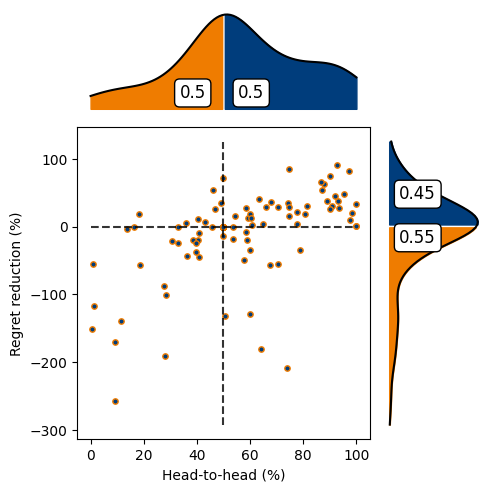

In [10]:
mu = mu_all[0]
lamb = lamb_all[0]
figure_name = result_dir + f"ddr_vs_spo_mu={mu}_lamb={lamb}"
# Upright_Figure(h2h_ddr_vs_spo[mu,lamb]*100, regret_rd_ddr_vs_spo[mu,lamb]*100, figure_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], 
#                         ymin = 0, ymax=100,xmin = 0,xmax = 100)
figure_plot_upright(h2h_ddr_vs_spo[mu,lamb]*100, regret_rd_ddr_vs_spo[mu,lamb]*100, figure_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], 
                        ysame = 0, yrange = [6,6], sublabel = '', ypio = 1)

##### DDR vs MSE

- Note that there are only five points are not the same.

In [11]:
# mu = mu_all[0]
# lamb = lamb_all[0]
# figure_name = result_dir + f"ddr_vs_mse_mu={mu}_lamb={lamb}"
# # Upright_Figure(h2h_ddr_vs_mse[mu,lamb]*100, regret_rd_ddr_vs_mse[mu,lamb]*100, figure_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], 
# #                         ymin = 0, ymax=100,xmin = 0,xmax = 100)
# figure_plot_upright(h2h_ddr_vs_mse[mu,lamb]*100, regret_rd_ddr_vs_mse[mu,lamb]*100, figure_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], 
#                         ysame = 0, yrange = [6,6], sublabel = '', ypio = 1)

### boxplot

In [12]:
# cost_MSE_avg = np.asarray([np.nanmean(cost_MSE[iter]) for iter in iteration_all])
# cost_SPO_avg = np.asarray([np.nanmean(cost_SPO[iter]) for iter in iteration_all])

In [13]:
# cost_MSE_avg_normalized = np.asarray([np.nanmean(cost_MSE[iter]/np.nanmean(cost_Oracle[iter])) for iter in iteration_all])
# cost_SPO_avg_normalized = np.asarray([np.nanmean(cost_SPO[iter]/np.nanmean(cost_Oracle[iter])) for iter in iteration_all])

In [14]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# iter = 0
# # 创建图形
# plt.figure(figsize=(10, 6))

# # 方法1: 使用matplotlib的boxplot
# plt.subplot(1, 2, 1)
# # plt.boxplot([cost_MSE[iter], cost_SPO[iter]], labels=['MSE', 'SPO'])
# plt.boxplot([cost_MSE_avg_normalized, cost_SPO_avg_normalized], labels=['MSE', 'SPO'])
# plt.title('Boxplot using matplotlib')
# plt.ylabel('Values')

# # # 方法2: 使用seaborn的boxplot (更美观)
# # plt.subplot(1, 2, 2)
# # sns.boxplot(data=[data1, data2], palette="Set2")
# # plt.xticks([0, 1], ['Group 1', 'Group 2'])
# # plt.title('Boxplot using seaborn')
# # plt.ylabel('Values')

# # 调整布局
# plt.tight_layout()

# # 显示图形
# plt.show()

# # # 保存图形
# # plt.savefig('boxplot_comparison.png')
# # print("箱线图已保存为 boxplot_comparison.png")
